In [4]:
import pandas as pd

# Read the dataset into a pandas DataFrame
df = pd.read_csv('C:/Users/shiv.kumar/Downloads/train.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate Rows:")
print(duplicates)


Missing Values:
id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion 

In [ ]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

Highlighted Outliers:
      Age  DailyRate  DistanceFromHome  MonthlyIncome
1024   50        630                16          16659
4      50       1017                 5          19033
1542   50        806                 9          17159
1031   29        994                29           2911
1019   58       1206                 2           4777


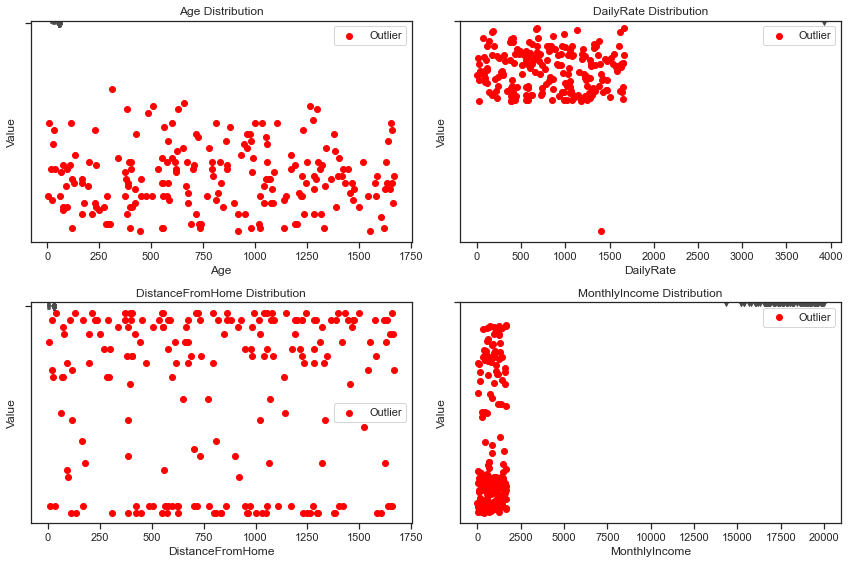

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/shiv.kumar/Downloads/train.csv')

# Set the style of the plots
sns.set(style="ticks")
# Set the style of the plots
sns.set(style="ticks")

# Identify outliers using Tukey's fences
def detect_outliers(df, features):
    outlier_indices = []
    
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        fence_low = Q1 - 1.5 * IQR
        fence_high = Q3 + 1.5 * IQR
        outliers = df[(df[feature] < fence_low) | (df[feature] > fence_high)]
        outlier_indices.extend(outliers.index)
    
    return list(set(outlier_indices))

# Specify the features to check for outliers
features_to_check = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome']

# Detect outliers
outlier_indices = detect_outliers(data, features_to_check)

# Display some of the outliers
outliers = data.loc[outlier_indices]
print("Highlighted Outliers:")
print(outliers[features_to_check].head())

# Plot boxplots with highlighted outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, feature in enumerate(features_to_check):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.boxplot(x=data[feature], ax=ax)
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Value')
    
    # Highlight outliers
    outlier_values = outliers[feature]
    ax.scatter(x=outlier_values.index, y=outlier_values.values, color='red', label='Outlier')
    ax.legend()

plt.tight_layout()
plt.show()


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1
22,22,51,Travel_Rarely,1107,Human Resources,2,3,Human Resources,1,1,...,80,0,33,2,3,31,9,6,13,0
22,22,51,Travel_Rarely,1107,Human Resources,2,3,Human Resources,1,1,...,80,0,33,2,3,31,9,6,13,0
22,22,51,Travel_Rarely,1107,Human Resources,2,3,Human Resources,1,1,...,80,0,33,2,3,31,9,6,13,0
44,44,44,Travel_Rarely,796,Research & Development,10,4,Medical,1,2,...,80,0,16,4,3,16,9,13,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,1590,39,Travel_Frequently,1425,Sales,7,2,Life Sciences,1,2,...,80,1,22,3,3,21,6,11,17,0
1640,1640,53,Travel_Rarely,1462,Research & Development,1,4,Medical,1,3,...,80,1,34,3,1,33,8,12,7,0
1640,1640,53,Travel_Rarely,1462,Research & Development,1,4,Medical,1,3,...,80,1,34,3,1,33,8,12,7,0
1640,1640,53,Travel_Rarely,1462,Research & Development,1,4,Medical,1,3,...,80,1,34,3,1,33,8,12,7,0


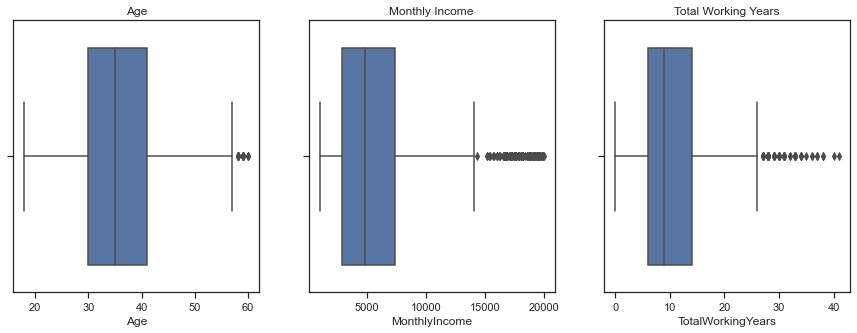

In [11]:
import numpy as np
from scipy import stats
df=data
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying outliers using Z-score
z = abs(stats.zscore(df[numerical_cols]))
outliers = np.where(z > 3)

# Display the outliers
display(df.iloc[outliers[0], :])

# Visualize outliers using boxplot
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x=df['Age'], ax=axs[0])
sns.boxplot(x=df['MonthlyIncome'], ax=axs[1])
sns.boxplot(x=df['TotalWorkingYears'], ax=axs[2])
axs[0].set_title("Age")
axs[1].set_title("Monthly Income")
axs[2].set_title("Total Working Years")
plt.show()
